In [1]:
# Page_View_Time_Series_Vis
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv')

df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


In [4]:
df.date = pd.to_datetime(df.date)
df.date

0      2016-05-09
1      2016-05-10
2      2016-05-11
3      2016-05-12
4      2016-05-13
          ...    
1299   2019-11-29
1300   2019-11-30
1301   2019-12-01
1302   2019-12-02
1303   2019-12-03
Name: date, Length: 1304, dtype: datetime64[ns]

In [5]:
df = df[(df.value >= (df.value.quantile(0.025))) & (df.value <= (df.value.quantile(0.975)))]

df

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325
...,...,...
1294,2019-11-24,138875
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238 entries, 10 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1238 non-null   datetime64[ns]
 1   value   1238 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 29.0 KB


Text(0, 0.5, 'Page Views')

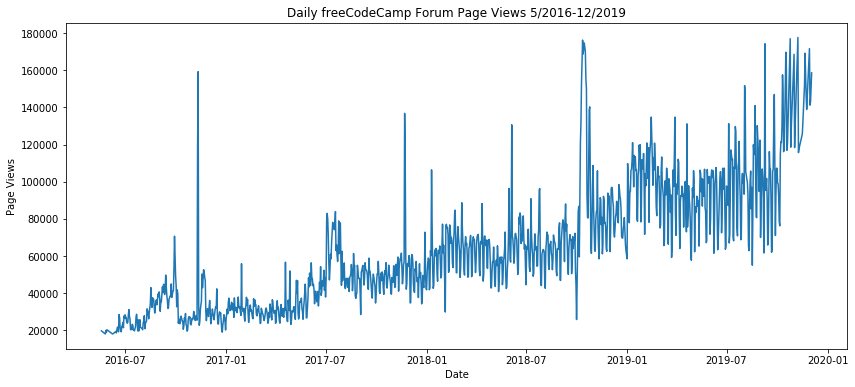

In [7]:
plt.figure(figsize=(14,6))
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax = sns.lineplot(data=df, x='date', y='value')
plt.xlabel("Date")
plt.ylabel("Page Views")

In [8]:
df_bar = pd.DataFrame(df)
df_bar['Year'] = df['date'].dt.year
df_bar['Month'] = df['date'].dt.month
df_bar_ave = df_bar.groupby(['Year', 'Month']).mean().unstack()
months = ['January', 'February', 'March', 'April' , 'May' , 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_bar_ave

value                                                           \
Month             1              2             3             4             5    
Year                                                                            
2016             NaN            NaN           NaN           NaN  19432.400000   
2017    32785.161290   31113.071429  29369.096774  30878.733333  34244.290323   
2018    58580.096774   65679.000000  62693.774194  62350.833333  56562.870968   
2019   102056.516129  105968.357143  91214.483871  89368.433333  91439.903226   

                                                                               \
Month            6             7              8             9              10   
Year                                                                            
2016   21875.105263  24109.678571   31049.193548  41476.866667   27398.322581   
2017   43577.500000  65806.838710   47712.451613  47376.800000   47438.709677   
2018   70117.000000  63591.064516   62831.612903  65941.733333  111378.142857   
2019   90435.642857  97236.566667  102717.310345  97268.833333  122802.272727   

                                     
Month             11             12  
Year                                 
2016    40448.633333   27832.419355  
2017    57701.566667   48420.580645  
2018    78688.333333   80047.483871  
2019   143166.428571  150733.500000

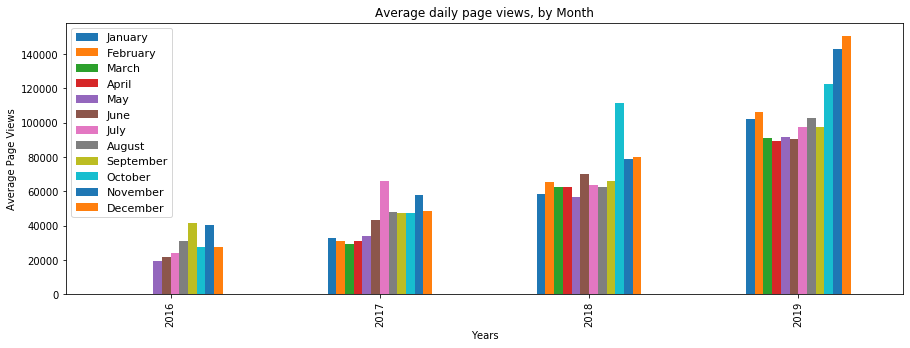

In [9]:
df_bar_ave.plot(kind ="bar", figsize=(15,5))
plt.title("Average daily page views, by Month")
plt.xlabel("Years")
plt.ylabel("Average Page Views")
plt.legend(fontsize =11, labels=months)

In [10]:
df_box = pd.DataFrame(df)
df_box['Year'] = df['date'].dt.year
df_box['Month'] = df['date'].dt.month
df_box.loc[df_box['Month'] == 1, 'Month'] = 'Jan'
df_box.loc[df_box['Month'] == 2, 'Month'] = 'Feb'
df_box.loc[df_box['Month'] == 3, 'Month'] = 'Mar'
df_box.loc[df_box['Month'] == 4, 'Month'] = 'Apr'
df_box.loc[df_box['Month'] == 5, 'Month'] = 'May'
df_box.loc[df_box['Month'] == 6, 'Month'] = 'Jun'
df_box.loc[df_box['Month'] == 7, 'Month'] = 'Jul'
df_box.loc[df_box['Month'] == 8, 'Month'] = 'Aug'
df_box.loc[df_box['Month'] == 9, 'Month'] = 'Sep'
df_box.loc[df_box['Month'] == 10, 'Month'] = 'Oct'
df_box.loc[df_box['Month'] == 11, 'Month'] = 'Nov'
df_box.loc[df_box['Month'] == 12, 'Month'] = "Dec"


In [11]:
df_box

,date,value,Year,Month
10,2016-05-19,19736,2016,May
17,2016-05-26,18060,2016,May
18,2016-05-27,19997,2016,May
19,2016-05-28,19044,2016,May
20,2016-05-29,20325,2016,May
...,...,...,...,...
1294,2019-11-24,138875,2019,Nov
1299,2019-11-29,171584,2019,Nov
1300,2019-11-30,141161,2019,Nov
1301,2019-12-01,142918,2019,Dec


Text(0, 0.5, 'Page Views')

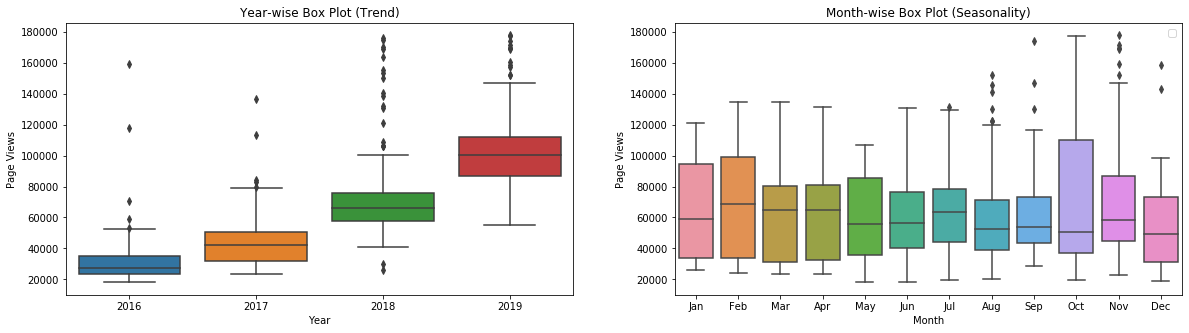

In [12]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=2, sharex=False)
plt.legend(fontsize =11, labels=months)
df_box.sort_values(by=['Year', 'date'], ascending=[False,True], inplace=True)

box_plot_year = sns.boxplot(x=df_box['Year'], y=df_box.value, ax=axes[0])
box_plot_year.set_title("Year-wise Box Plot (Trend)")
box_plot_year.set_xlabel('Year')
box_plot_year.set_ylabel('Page Views')

box_plot_month = sns.boxplot(x=df_box['Month'], y=df_box.value, ax=axes[1])
box_plot_month.set_title("Month-wise Box Plot (Seasonality)")
box_plot_month.set_xlabel('Month')
box_plot_month.set_ylabel('Page Views')